# LAA Assignment 5

submission by: Utpalraj Kemprai (MDS202352)

#### Loading the libraries and dataset

In [1]:
# importing necessary libraries
# python version 3.12.2
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# loading the dataset
data = mnist.load_data()

#### Splitting the train and test data

In [3]:
# sorting into train and test data
train, test = data
X_train, y_train = train
X_test, y_test = test

#### Function to unwrap images from matrix to vectors

In [4]:
# function to unwrap 28x28 image matrices in the train and test data
def unwrap(x):
    return np.reshape(x,newshape=(len(x),28*28))

In [5]:
# unwrapping the image matrices
X_train = unwrap(X_train)
X_test = unwrap(X_test)

In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

#### For each digit i form a matrix whose columns are images of that digit.

In [8]:
# dictionary to store training images for each digit
D = {}
np.random.RandomState(seed=42)

RandomState(MT19937) at 0x2B288CBB640

In [161]:
# storing the image matrices corresponding to each digit in D
# we choose 2500 images for each digit at random from train data
for i in range(10):
    D[i] = X_train[y_train == i][np.random.choice(range(len(y_train[y_train==i])),3000,replace=False)]
    D[i] = np.transpose(D[i])

#### Function to calculate first 4 principal components

In [162]:
def first4_left_vectors(M):
    U, S, Vt = np.linalg.svd(M,full_matrices=True,compute_uv=True)
    U = np.transpose(U)
    return U[0].T,U[1].T,U[2].T,U[3].T

#### Image from training data and left singular vectors of D[i] for i = 0, 1, $\cdots$,9

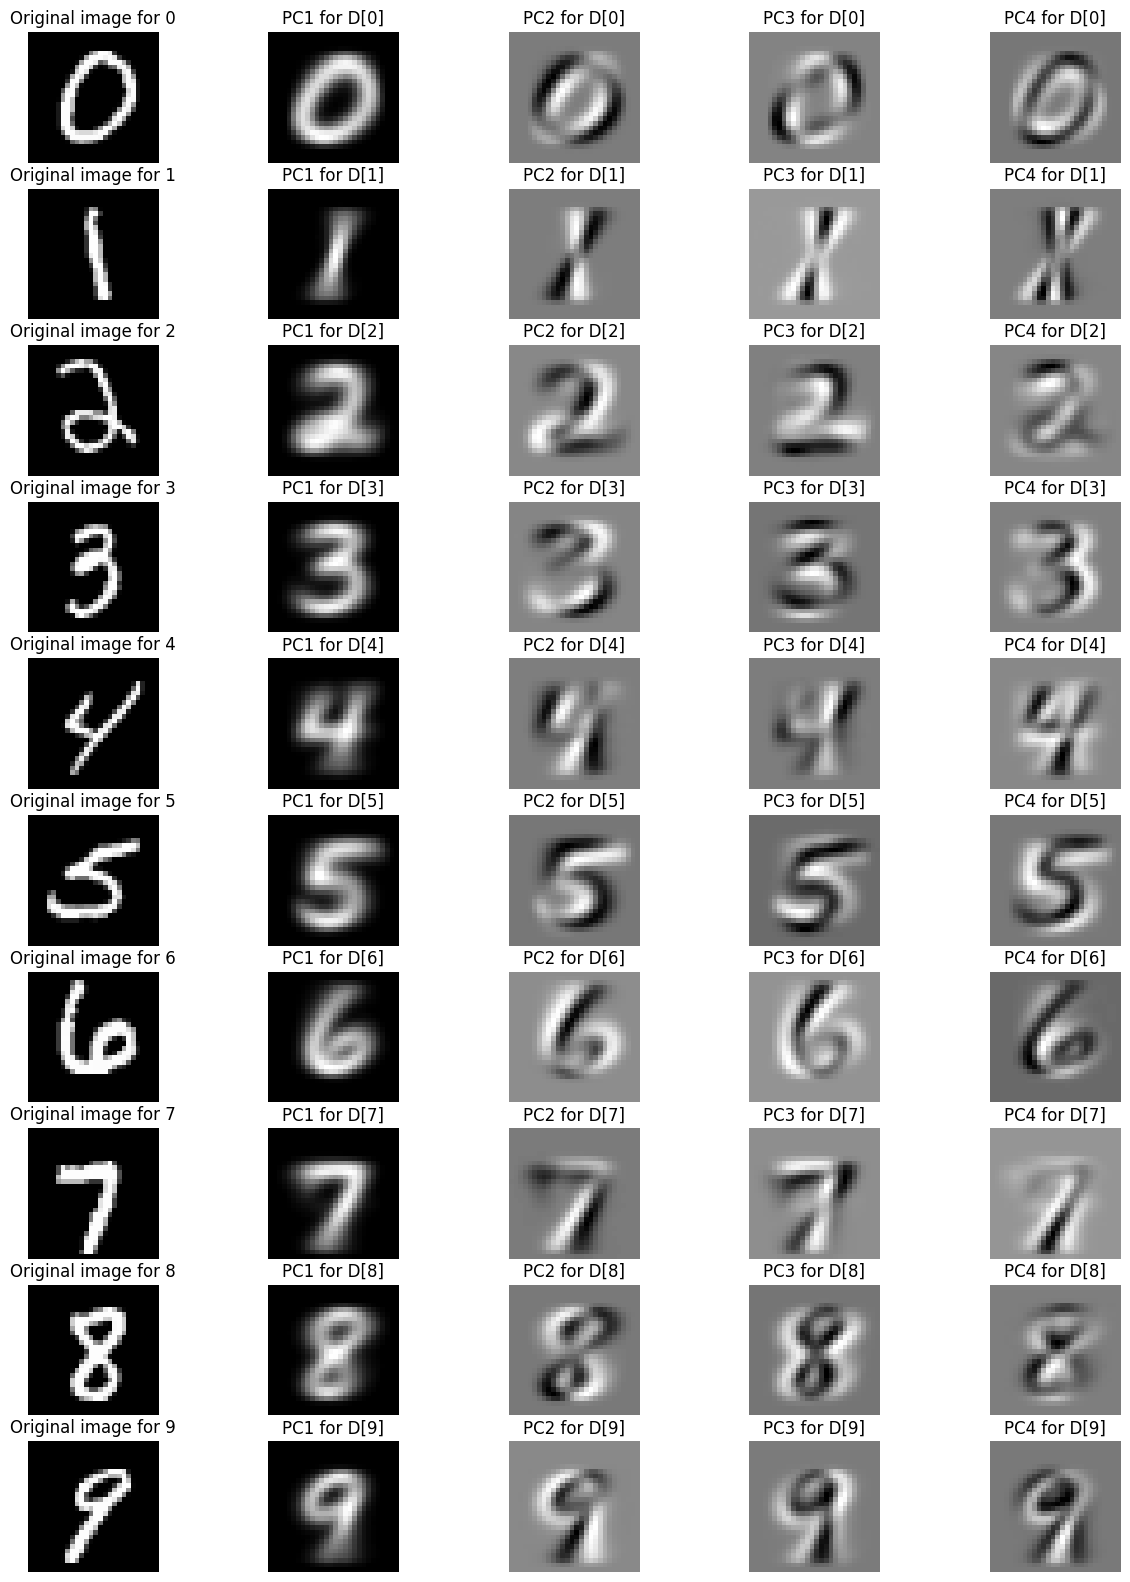

In [163]:
fig ,ax = plt.subplots(10,5)
fig.set_figwidth(15)
fig.set_figheight(20)
for i in range(10):
    d = first4_left_vectors(D[i])
    for j in range(5):
        if j > 0:
            ax[i,j].imshow(d[j-1].reshape(28,28),cmap=plt.get_cmap('gray_r'))
            ax[i, j].axis('off')
            ax[i,j].set_title("PC" + str(j) + " for D[" + str(i) +"]")
        else:
            ax[i,j].imshow(D[i].T[0].reshape(28,28),cmap = plt.get_cmap('gray'))
            ax[i,j].axis('off')
            ax[i,j].set_title("Original image for "+ str(i))


#### Function for SVD of image matrices

In [164]:
def svd(D):
    U, S, Vt = np.linalg.svd(D,full_matrices=True,compute_uv=True)
    out = U, S, Vt
    return out  

In [165]:
svd_images = [svd(D[i]) for i in range(10)]

### Digit classifier
We define the following digit classifier :
 $\rho(z) = \underset{0 \leq n \leq 9}{\operatorname{argmin}}\{\min\limits_x{ \|\hat{D}(n) x - z\|_{2}}\}$

where $\hat{D}(n) = U_r\Sigma_r V_r^T$ is a low rank approximation of $D(n) = U\Sigma V^T$

The reason behind our choice of the expression is that, for our choice of expression is that,

$\min\limits_x{ \|\hat{D}(n) x - z\|_{2}}$ is easier to compute than $\min\limits_x{ \|D(n) x - z\|_{2}}$ 
and is also approximately equal to the latter.

As,

$\|\hat{D}(n) x - z\|^2_{2} $ is minimized for $x = V \Sigma^{-1}U^T z$

So, $\min\limits_x \|\hat{D}(n) x - z\|_{2} = \| U_rU_r^T z - z\|_2$

And so, $\rho(z) = \underset{0 \leq n \leq 9}{\operatorname{argmin}} \{\| U_rU_r^T z - z\|_2:\hat{D}(n) = U_r\Sigma_r V_r^T, rank(\hat{D}(n)) = r \} $
 which is the expression we use for our digit classifier below.

#### Function for digit classification of image vectors

In [166]:
def digit_classifier(z,k = 4):
    result = 0
    m = (np.linalg.norm(svd_images[0][0][:,:k]@((svd_images[0][0][:,:k]).T@z) - z))
    for i in range(1,10):
        norm = (np.linalg.norm(svd_images[i][0][:,:k]@((svd_images[i][0][:,:k]).T@z) - z))
        if norm < m:
            result = i
            m = norm
    return result

#### Performance on Test Data

In [167]:
n = len(y_test)
y_pred = [-1 for i in range(n)]

In [191]:
from tqdm import tqdm
# using first 15 columns of U
start = time()
for i in tqdm(range(n)):
    y_pred[i] = digit_classifier(X_test[i],k = 15)
end = time()
    

100%|██████████| 10000/10000 [00:14<00:00, 700.57it/s]


Average Time needed by the digit classifier for classifying a digit (sec)

In [192]:
(end - start)/len(y_pred)

0.0014277235507965088

##### Accuracy of digit classifier

In [193]:
# accuracy
sum(y_pred == y_test)/len(y_test)

0.9518

##### Confusion Matrix

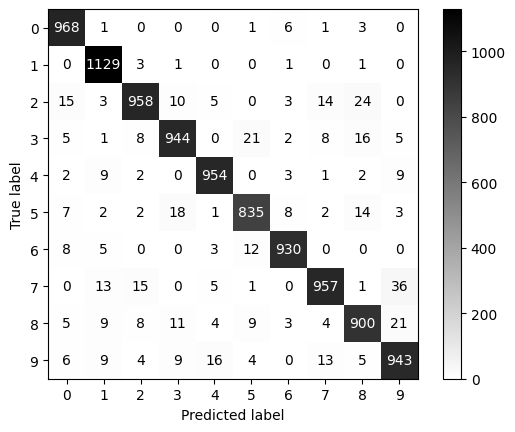

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = list(range(10)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(10)))
disp.plot(cmap = plt.get_cmap('gray_r'))
plt.show()

##### Classification Report

In [195]:
print(classification_report(y_test,y_pred,labels=list(range(10)),digits=3))

              precision    recall  f1-score   support

           0      0.953     0.988     0.970       980
           1      0.956     0.995     0.975      1135
           2      0.958     0.928     0.943      1032
           3      0.951     0.935     0.943      1010
           4      0.966     0.971     0.969       982
           5      0.946     0.936     0.941       892
           6      0.973     0.971     0.972       958
           7      0.957     0.931     0.944      1028
           8      0.932     0.924     0.928       974
           9      0.927     0.935     0.931      1009

    accuracy                          0.952     10000
   macro avg      0.952     0.951     0.951     10000
weighted avg      0.952     0.952     0.952     10000

